In [65]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [53]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [54]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [55]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [56]:
# reflect an existing database into a new model
Base=automap_base()
# reflect the tables
Base.prepare(autoload_with=engine)

In [57]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [58]:
# Save references to each table
measurements=Base.classes.measurement
stations=Base.classes.station

In [59]:
# Create our session (link) from Python to the DB
session=Session(engine)

# Exploratory Precipitation Analysis

In [60]:
# Find the most recent date in the data set.
most_recent_date=session.query(measurements.date).order_by(measurements.date.desc()).first()
most_recent_date

('2017-08-23',)

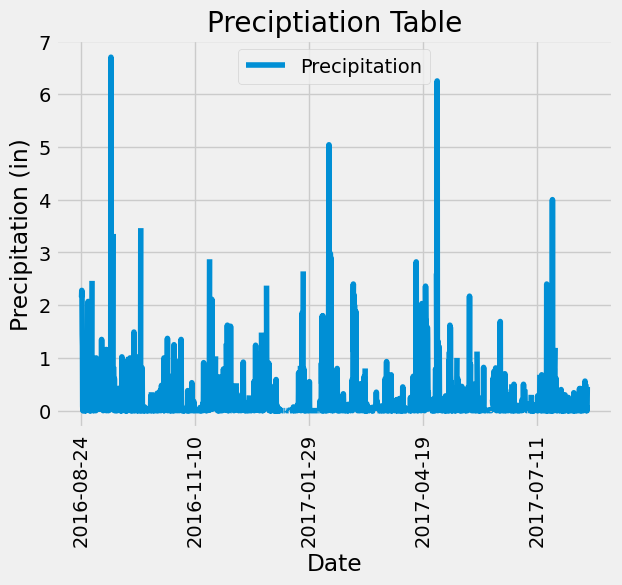

In [61]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 


# Calculate the date one year from the last date in data set.
year_ago=dt.datetime(2017,8,23) - dt.timedelta(days=365)
year_ago

# Perform a query to retrieve the data and precipitation scores
precip=session.query(measurements.date, measurements.prcp).filter(measurements.date>= year_ago).all()

# Save the query results as a Pandas DataFrame. Explicitly set the column names
precip_df=pd.DataFrame(precip, columns=["Date", "Precipitation"])
precip_df.head()
# Sort the dataframe by date
precip_sort_df = precip_df.sort_values('Date')
precip_sort_df
# Use Pandas Plotting with Matplotlib to plot the data
precip_sort_df.plot(x='Date', y='Precipitation', rot=90)
plt.title ("Preciptiation Table")
plt.ylabel("Precipitation (in)")
plt.xlabel("Date")
plt.show()


In [62]:
# Use Pandas to calculate the summary statistics for the precipitation data
precip_df.describe()

,Precipitation
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [63]:
# Design a query to calculate the total number of stations in the dataset
totalstations=session.query(stations.station).all()
totalstations

#count them
count_stations=session.query(func.count(stations.station)).first()[0]
count_stations

9

In [70]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
most_active = session.query(measurements.station, func.count(measurements.station)).\
    group_by(measurements.station).\
    order_by(func.count(measurements.station).desc()).all()

most_active

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [80]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
most_active_station = most_active[0]
#most_active_station

highest_temp = session.query(func.max(measurements.tobs)).all()[0][0]
highest_temp

lowest_temp = session.query(func.min(measurements.tobs)).all()[0][0]
lowest_temp

avg_temp = session.query(func.avg(measurements.tobs)).all()[0][0]
avg_temp


73.09795396419437

<AxesSubplot:ylabel='Frequency'>

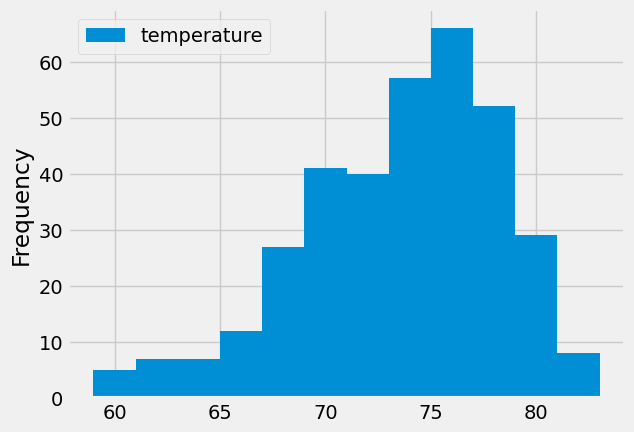

In [85]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
most_active = session.query(measurements.tobs).\
    filter(measurements.station == 'USC00519281').\
    filter(measurements.date >= year_ago).all()

most_active

tempobsdf = pd.DataFrame(most_active, columns=['temperature'])
tempobsdf

tempobsdf.plot.hist(bins=12)

# Close Session

In [86]:
# Close Session
session.close()